In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset=pd.read_csv("Zomato_data.csv")
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [6]:
# Data cleaning and processing

In [11]:
def handlerate(value):
    value=str(value).split('/')
    value=value[0]
    return float(value)
dataset["rate"]=dataset["rate"].apply(handlerate)
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


In [13]:
dataset.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

In [14]:
# Exploring Restaurany types

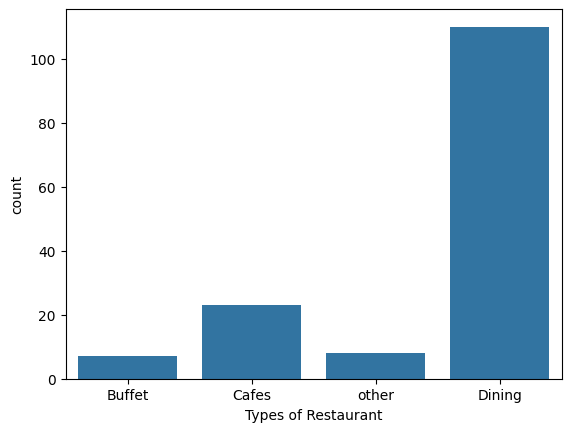

In [18]:
sns.countplot(x="listed_in(type)",data=dataset)
plt.xlabel("Types of Restaurant")
plt.show()

In [36]:
## Conclusion: Majority of Restaurants fall into the Dining Catagory

Text(0, 0.5, 'Votes')

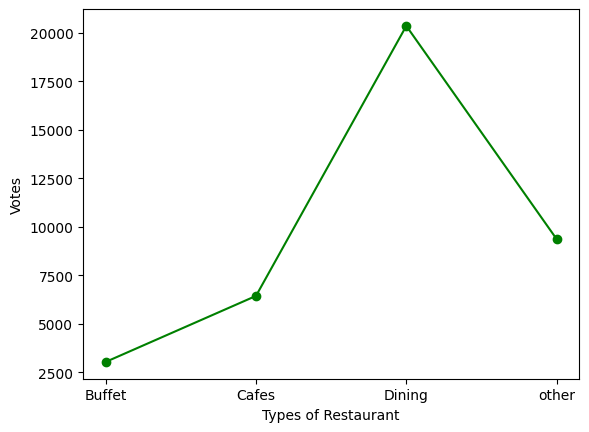

In [24]:
grouped_data=dataset.groupby("listed_in(type)")["votes"].sum()
result=pd.DataFrame({"vote":grouped_data})
plt.plot(result,c="green",marker="o")
plt.xlabel("Types of Restaurant")
plt.ylabel("Votes")

In [37]:
## Conclusion: Dining Restaurants are preferred by Large number of individuals

In [25]:
#Identify the most voted Restaurant

In [32]:
max_votes=dataset["votes"].max()
Restaurant_max_votes=dataset.loc[dataset["votes"]==max_votes,"name"]
print("Restaurants with the maximum votes:")
Restaurant_max_votes

Restaurants with the maximum votes:


38    Empire Restaurant
Name: name, dtype: object

In [33]:
#Online order availability

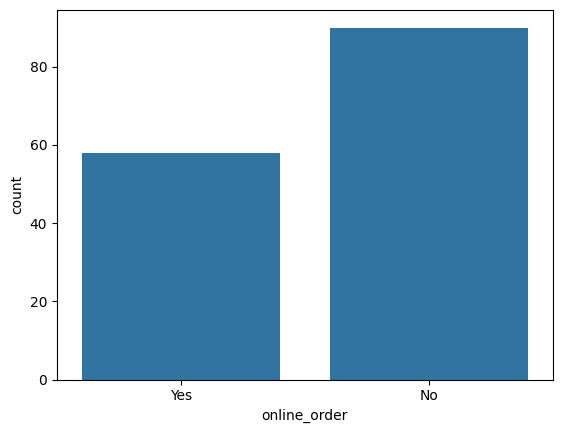

In [35]:
sns.countplot(x="online_order",data=dataset)
plt.show()

In [38]:
# conclusion: This suggests a majority of the Restaurants do not accept online orders

In [39]:
#Analyze Ratings

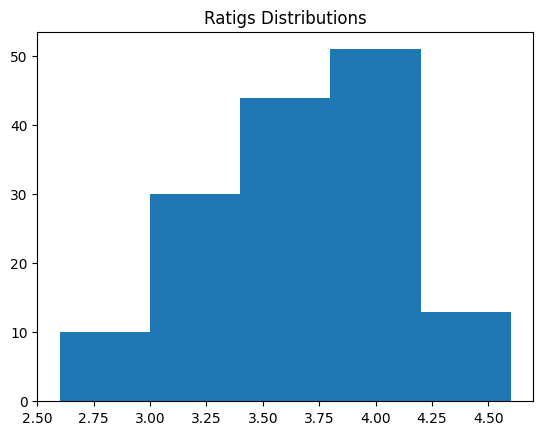

In [41]:
plt.hist(x="rate",data=dataset,bins=5)
plt.title("Ratigs Distributions")
plt.show()

In [42]:
# Majority of Restaurants received ratings ranging from 3.5 to 4

In [43]:
#Approimate cost for couples

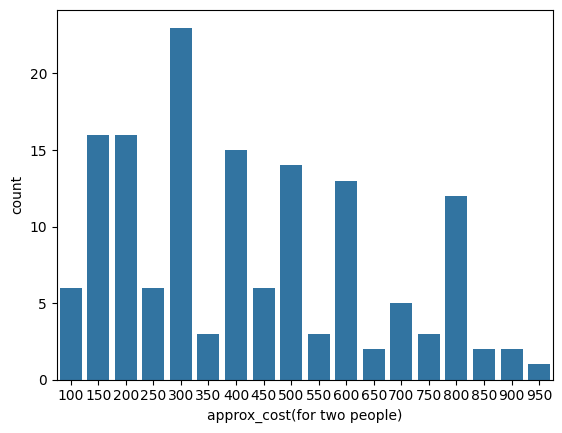

In [46]:

sns.countplot(x="approx_cost(for two people)",data=dataset)
plt.show()

In [48]:
#conclusion:Majority of couples prefer approximate cost of 300 rupees

In [49]:
#Ratings Comparison-- Online vs offline orders

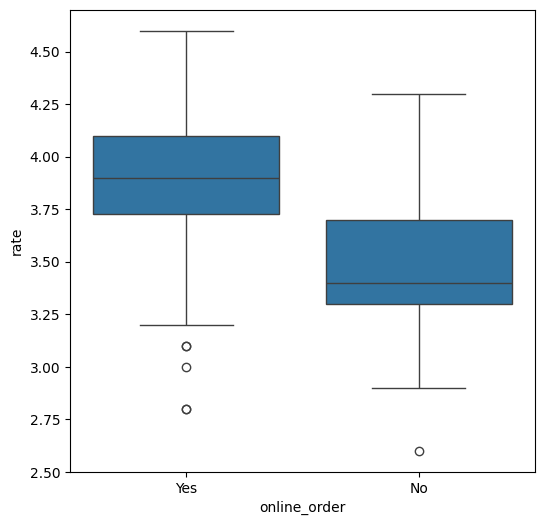

In [51]:
plt.figure(figsize=(6,6))
sns.boxplot(x="online_order",y="rate",data=dataset)
plt.show()

In [52]:
#Conclusion:Offline orders received lower ratings in comparison to online orders which obtained excellent ratings.

In [53]:
# Order mode preferences by Restaurant type

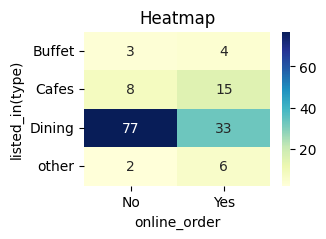

In [61]:

pivot_table=dataset.pivot_table(index="listed_in(type)",columns="online_order",aggfunc="size",fill_value=0)
plt.figure(figsize=(3,2))
sns.heatmap(pivot_table,annot=True,cmap='YlGnBu', fmt='d')
plt.title("Heatmap")
plt.show()

In [58]:
## So, Dining Restaurants primarily accepts Offline orders, whereas Cafes accepts online_orders.